Exercise: Outlier removal using standard deviation and z score
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [2]:
# import require library 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load the dataset
df = pd.read_csv("bhp.csv")

# show no. of rows and column of the dataset
print(df.shape)

# show top five value just to analyze the dataset
df.head()

(13200, 7)


location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250

In [3]:
# analyse the dataset through statistical result using describe for price_per_sqft as this is the target feature
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

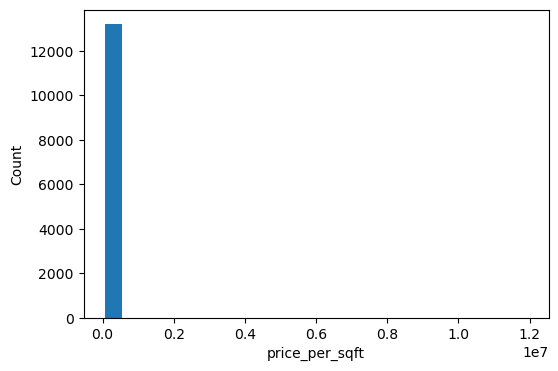

In [16]:
# plot histogram 
plt.figure(figsize=(6,4))
plt.xlabel("price_per_sqft")
plt.ylabel("Count")
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.show()

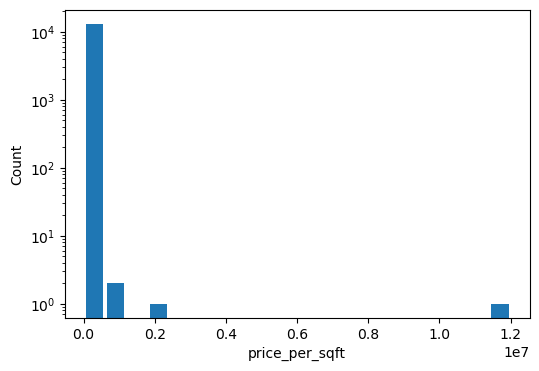

In [17]:
# plot histogram using log scale as the value are too learge many of the other values doesn't show up on the chart
plt.figure(figsize=(6,4))
plt.xlabel("price_per_sqft")
plt.ylabel("Count")
plt.yscale('log')
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.show()

## (1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

result

In [18]:
# minimum and maximum limit for outlier using percentile 
min_limit, max_limit = df.price_per_sqft.quantile([0.001, 0.999])
min_limit, max_limit

(1366.184, 50959.36200000098)

In [19]:
# let's analyse how many outlier value we have
len(df[(df.price_per_sqft<min_limit) | (df.price_per_sqft>max_limit)])

28

## (2) After removing outliers in step 1, you get a new dataframe.


In [20]:
# remove the outliers and save it in new dataframe
new_df = df[(df.price_per_sqft> min_limit) & (df.price_per_sqft < max_limit)]
new_df.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250

In [21]:
# compare the row value of two dataframe before and after outliers are remove
df.shape, new_df.shape

((13200, 7), (13172, 7))

In [22]:
# lets display standard deviation value
std = new_df.price_per_sqft.std()
std

4141.020700174605

## (3) On step(2) dataframe, use 4 standard deviation to remove outliers


In [29]:
# set lower and upper limit for outlier
lower_limit = new_df.price_per_sqft.mean() - 4* new_df.price_per_sqft.std()
upper_limit = new_df.price_per_sqft.mean() + 4* new_df.price_per_sqft.std()
lower_limit, upper_limit

(-9900.429065502549, 23227.73653589429)

In [30]:
# remove another outlier using standard deviation
new_df1 = new_df[(new_df.price_per_sqft > lower_limit) & (new_df.price_per_sqft < upper_limit)]
new_df1.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250

In [31]:
# comparing previous and newly create dataframe 
new_df.shape, new_df1.shape

((13172, 7), (13047, 7))

In [32]:
# no. of outliers remove using standard deviation
len(new_df[(new_df.price_per_sqft < lower_limit) | (new_df.price_per_sqft > upper_limit)])

125

## (4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

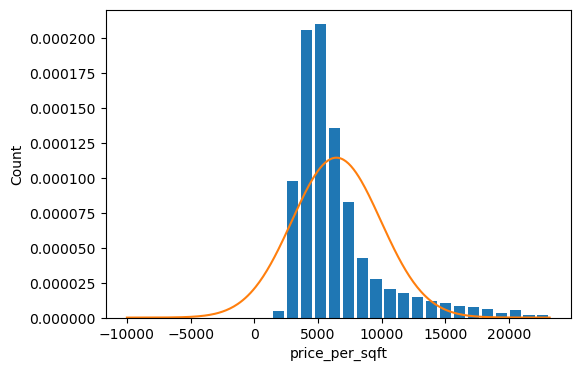

In [41]:
# plot histogram of the dataframe after outliers are remove using standard deviation
from scipy.stats import norm 

plt.figure(figsize=(6,4))
plt.hist(new_df1.price_per_sqft, bins=20, rwidth=0.8, density=True)

rng = np.arange(-10000, new_df1.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng, new_df1.price_per_sqft.mean(), new_df1.price_per_sqft.std()))
plt.xlabel("price_per_sqft")
plt.ylabel("Count")
plt.show()

## (5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same 

In [42]:
new_df.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250

In [47]:
import warnings

warnings.filterwarnings('ignore')

In [48]:
new_df['z_score'] = (new_df.price_per_sqft - new_df.price_per_sqft.mean())/new_df.price_per_sqft.std()
new_df

location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft   z_score  
0                3699 -0.715923  
1                4615 -0.494722  
2                4305 -0.569583  
3                6245 -0.101099  
4                4250 -0.582864  
...               ...       ...  
13195            6689  0.006121  
13196           11111  1.073973  
13197            5258 -0.339446  
13198           10407  0.903967  
13199            3090 -0.862989  

[13172 rows x 8 columns]

In [52]:
# remove the outlier that are below -4 and above 4 z_score
new_df2 = new_df[(new_df.z_score > -4) & (new_df.z_score <4)]
print(new_df2.shape)
new_df2.head()

(13047, 8)


location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft   z_score  
0            3699 -0.715923  
1            4615 -0.494722  
2            4305 -0.569583  
3            6245 -0.101099  
4            4250 -0.582864

In [53]:
# total outlier remove using z_score is
len(new_df[(new_df.z_score <-4) | (new_df.z_score > 4)])

125